Кузьмин Вадим БПМ-142

# Default of credit card clients Data Set 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [17]:
df = pd.read_excel("default of credit card clients.xls",header = 1)# ,index_col = 0)
df = df.drop("ID",1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [18]:
df.shape

(30000, 24)

* __ Посмотрим, есть ли пропуски в данных __

In [19]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

* __Имеем: очень большая размерность данных (30000 х 24) и пропусков нет__

In [20]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

В описании дано только для значений от 1 до 4, удалим все объекты, у которых значения не в описанных границах

In [21]:
df = df[df.EDUCATION != 5]
df = df[df.EDUCATION != 6]
df = df[df.EDUCATION != 0]

In [22]:
df['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
0       54
Name: MARRIAGE, dtype: int64

In [23]:
df = df[df.MARRIAGE != 0]

In [24]:
df.shape

(29601, 24)

* __ В смысле уменьшения размерности может и бесполезно (уменьшили кол-во объектов на 400), но данные стали более логичными __

In [25]:
features = df.columns.values.tolist()
print(" | ".join(features))

LIMIT_BAL | SEX | EDUCATION | MARRIAGE | AGE | PAY_0 | PAY_2 | PAY_3 | PAY_4 | PAY_5 | PAY_6 | BILL_AMT1 | BILL_AMT2 | BILL_AMT3 | BILL_AMT4 | BILL_AMT5 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 | default payment next month


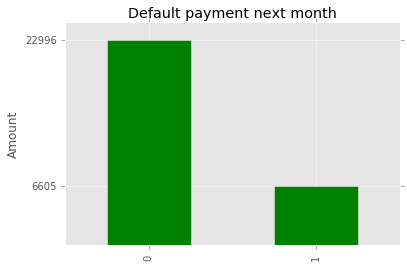

In [26]:
count = df["default payment next month"].value_counts()
df["default payment next month"].value_counts().plot(kind = 'bar', yticks = [count[0],count[1]], color = 'green')
plt.ylabel("Amount")
plt.title('Default payment next month')

In [27]:
matrix = np.array(df)
y = matrix[:,-1]
X = matrix[:,:-1]

In [28]:
from scipy.stats import pearsonr
coef = []
for i in range(len(features)-1):
    coef.append(pearsonr(X[:,i], y)[0])

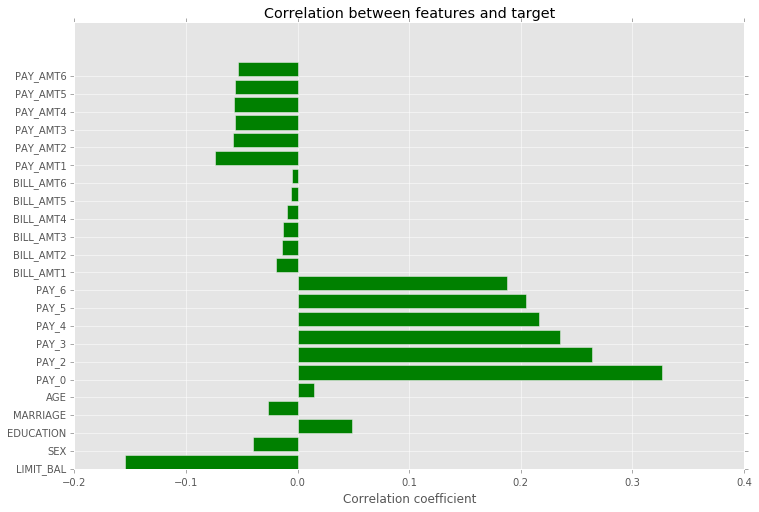

In [29]:
ypos = np.arange(len(coef))
plt.figure(figsize=(12,8))
plt.barh(ypos, coef, color = 'green')
plt.yticks(ypos, features[:-1])
plt.title('Correlation between features and target')
plt.xlabel("Correlation coefficient")

* Как мы видим, сильной корреляции между каким-либо признаком и ответом нет

__ Необходимо обработать бинарные и категориальные признаки, таких у нас 3, для каждого признака используем one-hot кодирование __
* X2: Gender (1 = male; 2 = female). 
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others)

In [30]:
new_df = pd.concat([pd.get_dummies(df["SEX"]), 
                    pd.get_dummies(df["EDUCATION"]), pd.get_dummies(df["MARRIAGE"])],axis = 1)

new_df.columns = ['male', 'female', 'graduate school','university','high school','others',
                  'married','single','others']
new_df.head()

,male,female,graduate school,university,high school,others,married,single,others
0,0,1,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0
2,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,0,1,0,0
4,1,0,0,1,0,0,1,0,0


In [31]:
new_features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
                'PAY_AMT5','default payment next month']

data = pd.concat((new_df, df[new_features]), axis=1)
features = data.columns.values.tolist()
data.head()

,male,female,graduate school,university,high school,others,married,single,others,LIMIT_BAL,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,default payment next month
0,0,1,0,1,0,0,1,0,0,20000,...,689,0,0,0,0,689,0,0,0,1
1,0,1,0,1,0,0,0,1,0,120000,...,2682,3272,3455,3261,0,1000,1000,1000,0,1
2,0,1,0,1,0,0,0,1,0,90000,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,0
3,0,1,0,1,0,0,1,0,0,50000,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,0
4,1,0,0,1,0,0,1,0,0,50000,...,35835,20940,19146,19131,2000,36681,10000,9000,689,0


In [32]:
matrix = np.array(data)
y = matrix[:,-1]
X = matrix[:,:-1]

__ Необходимо отнормировать данные и разбить на обучающую и тестовую__

In [33]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
                                                    random_state=0)

__ Сравним классификаторы __

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability = True),
    SVC(gamma=2, C=1, probability = True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1), # alpha = 1
    GradientBoostingClassifier(warm_start = True),
    AdaBoostClassifier(),
    GaussianNB()]

In [37]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "GradientBoosting", "AdaBoost",
         "Naive Bayes"]

# Посмотрим на F-score и Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [39]:
def test_clf(clf, train, test, add = False, d):
    model = clf.fit(train,y_train)
    y_pred = model.predict(test)
    if add:
        print("Accuracy = ",accuracy_score(y_test, y_pred))
        print("Precision = ", precision_score(y_test, y_pred))
    print("F-score = ",f1_score(y_test, y_pred))
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    class_names = ['No','Yes']
    # Plot confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

    plt.show()

Nearest Neighbors
Accuracy =  0.777045857613
Precision =  0.485624673288
F-score =  0.413072476656


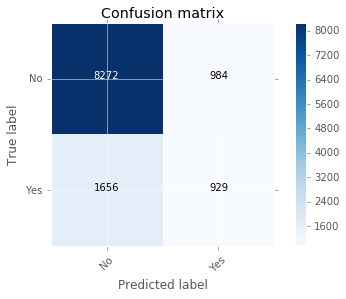

Linear SVM
Accuracy =  0.812009120851
Precision =  0.704675028506
F-score =  0.357019064125


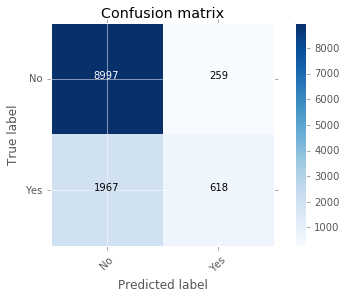

RBF SVM
Accuracy =  0.788024660079
Precision =  0.602179836512
F-score =  0.14972899729


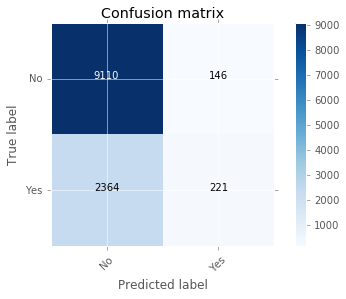

Decision Tree
Accuracy =  0.822650114011
Precision =  0.669936930624
F-score =  0.476570289133


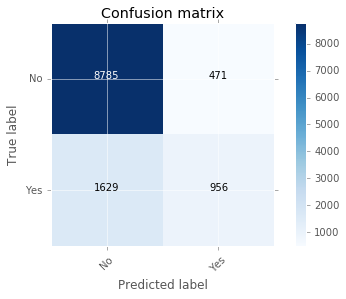

Random Forest
Accuracy =  0.796132083439
Precision =  0.702127659574
F-score =  0.197473404255


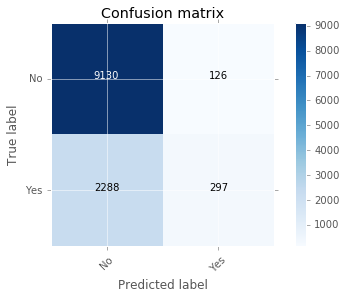

Neural Net
Accuracy =  0.822565661684
Precision =  0.677679882526
F-score =  0.467696985052


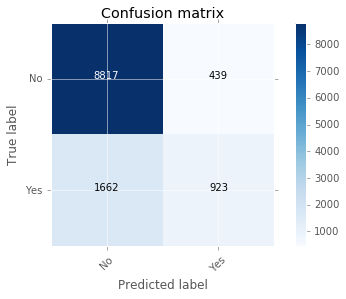

GradientBoosting
Accuracy =  0.823072375644
Precision =  0.674501424501
F-score =  0.474805715718


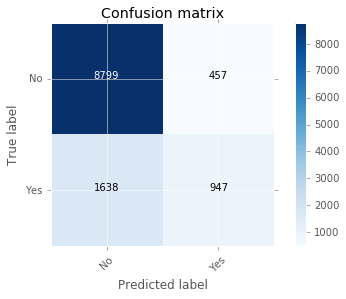

AdaBoost
Accuracy =  0.820792162824
Precision =  0.685645549318
F-score =  0.44624217119


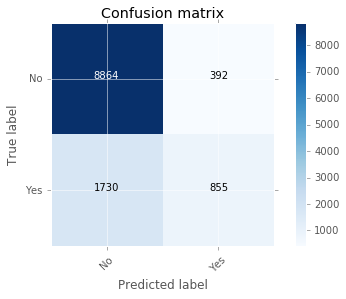

Naive Bayes
Accuracy =  0.611603749683
Precision =  0.329956095914
F-score =  0.459386387681


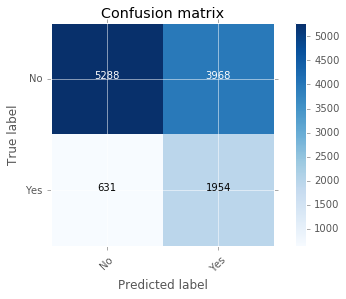

In [41]:
for i, clf in enumerate(classifiers):
    print(names[i])
    test_clf(clf,X_train,X_test, add = True)

# Посмотрим на AUC-ROC

In [42]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [43]:
colors = ['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange', 'purple','coral','grey']
lw = 2

In [44]:
probab = []
for i, clf in enumerate(classifiers):
    probab.append(clf.fit(X_train, y_train).predict_proba(X_test))

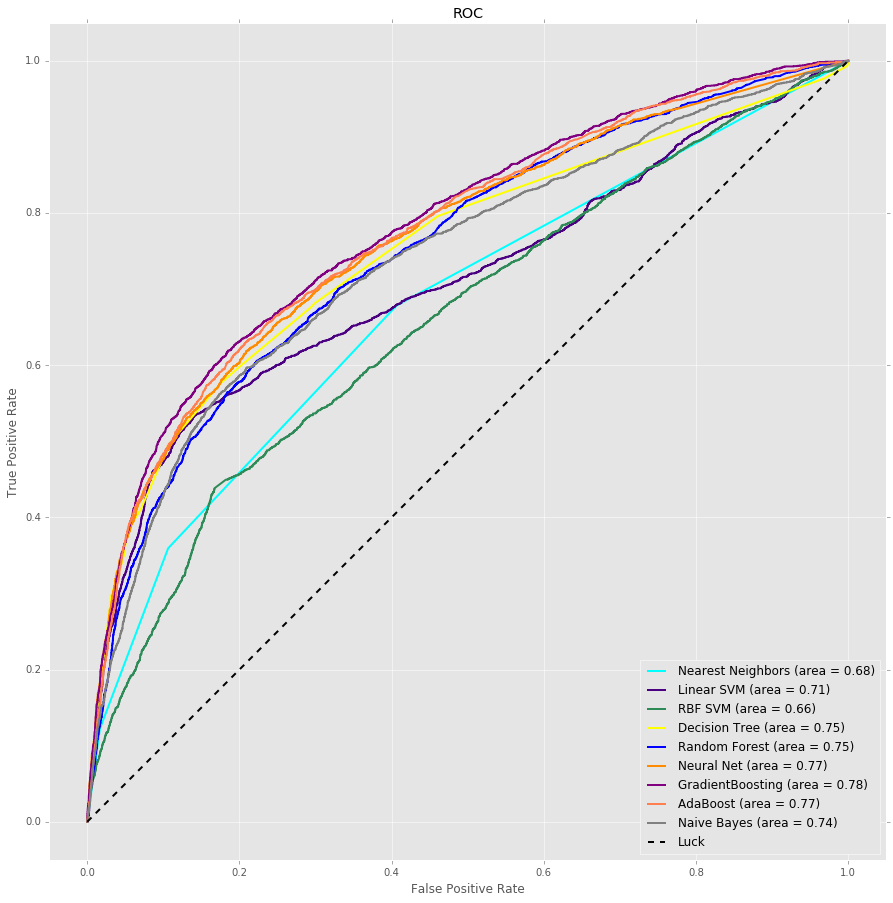

In [46]:
plt.figure(figsize=(15,15))
mean_fpr = np.linspace(0, 1, 100)
for i, probas_ in enumerate(probab):
    mean_tpr = 0.0
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color = colors[i],
            label='{0} (area = {1})'.format(names[i], "%.2f" % roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


Максимальная площадь у Градиентного бустинга, Ада бустинг и Неронная сеть имеют почти такую же площадь, хуже всего справляются метод ближайших соседей и SVM с полиномом 2 степени.

Попробуем улучшить Random Forest

Accuracy =  0.804239506798
Precision =  0.727427597956
F-score =  0.269230769231


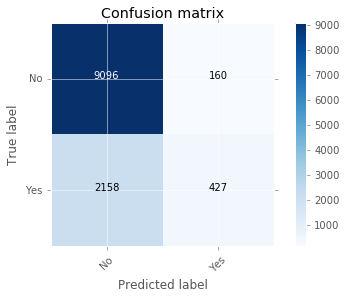

In [54]:
test_clf(RandomForestClassifier(max_depth=2, n_estimators=50),X_train,X_test, add = True)

In [55]:
RandomForestClassifier(max_depth=2, n_estimators=50).fit(X_train, y_train).predict_proba(X_test)

mean_fpr = np.linspace(0, 1, 100)
mean_tpr = 0.0
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
roc_auc

0.73929633598531519

* Больших улучшений не принесло

__ Составим таблицу: __

In [50]:
clf_data = [0.777,0.486,0.413,0.68, 0.812, 0.705,0.357,0.71,0.788, 0.602,0.1497, 0.66, 0.823, 0.6699, 0.477, 0.75,
           0.796, 0.702, 0.197, 0.75, 0.823, 0.678, 0.468, 0.77, 0.823, 0.675, 0.475, 0.78, 0.821, 0.686, 0.446, 0.77,
           0.612, 0.32996, 0.459, 0.74]
table = pd.DataFrame(np.reshape(clf_data, (9,4)), columns=["Accuracy", "Precision", "F-measure","AUC-ROC"],
                      index=names)
table

,Accuracy,Precision,F-measure,AUC-ROC
Nearest Neighbors,0.777,0.48600,0.4130,0.68
Linear SVM,0.812,0.70500,0.3570,0.71
RBF SVM,0.788,0.60200,0.1497,0.66
Decision Tree,0.823,0.66990,0.4770,0.75
Random Forest,0.796,0.70200,0.1970,0.75
Neural Net,0.823,0.67800,0.4680,0.77
GradientBoosting,0.823,0.67500,0.4750,0.78
AdaBoost,0.821,0.68600,0.4460,0.77
Naive Bayes,0.612,0.32996,0.4590,0.74


__ Лучшим можно считать Градиентный бустинг.__